In [14]:
import pandas as pd
import numpy as np
import os
from config import C_COMMON, C_SINGLE, C_GRID
from copy import deepcopy
import time
import matplotlib.pyplot as plt

# import models
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_6grid.csv')

# base model

In [3]:
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_6grid.csv')
# split
df_train = df.query('year < 1984')
df_valid = df.query('1984 <= year < 1997')
df_test = df.query('1997 <= year')

assert df_train.shape[0] + df_valid.shape[0] + df_test.shape[0] == df.shape[0]

# Define columns: lat, lon and 16 reanalysis variables
columns = deepcopy(C_SINGLE + C_COMMON)
for r in ['fold', 'skn', 'year', 'month', 'data_in', 'season_wet', 'elevation']:
    columns.remove(r)

In [6]:
Xtrain, Ytrain = np.array(df_train[columns]), np.array(df_train['data_in'])
Xvalid, Yvalid = np.array(df_valid[columns]), np.array(df_valid['data_in'])
Xtest, Ytest = np.array(df_test[columns]), np.array(df_test['data_in'])

In [7]:
for _ in range(5):
    # hyperparameters acquired in external experiment
    linear_regression = LinearRegression()
    random_forest = RandomForestRegressor(
        n_estimators=270,
        max_depth=None,
        min_samples_split=3,
        n_jobs=-1,
        verbose=False,
    )

    xgboost = XGBRegressor(
        n_estimators=210,
        learning_rate=0.1,
        max_depth=9,
        n_jobs=-1,
        subsample=0.9,
        seed=np.random.randint(100),
        verbosity=0
    )
    linear_regression.fit(Xtrain, Ytrain)
    xgboost.fit(Xtrain, Ytrain)
    # gradient_boost.fit(Xtrain, Ytrain)
    random_forest.fit(Xtrain, Ytrain)

    mse_base = [
        mean_squared_error(Ytest, linear_regression.predict(Xtest)),
        mean_squared_error(Ytest, random_forest.predict(Xtest)),
        # mean_squared_error(Ytest, gradient_boost.predict(Xtest)),
        mean_squared_error(Ytest, xgboost.predict(Xtest)),
    ]

    print(f"{mse_base=}")

mse_base=[28.55376711301076, 17.78627188163026, 16.257087519664214]
mse_base=[28.55376711301076, 17.77116719555559, 16.19685882533633]
mse_base=[28.55376711301076, 17.66887617269526, 16.11259673255068]
mse_base=[28.55376711301076, 17.814586917186457, 15.950886489985368]
mse_base=[28.55376711301076, 17.85522221089766, 16.605416872783817]


# include season_wet

In [8]:
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_6grid.csv')
# split
df_train = df.query('year < 1984')
df_valid = df.query('1984 <= year < 1997')
df_test = df.query('1997 <= year')

assert df_train.shape[0] + df_valid.shape[0] + df_test.shape[0] == df.shape[0]

# Define columns: lat, lon and 16 reanalysis variables
columns = deepcopy(C_SINGLE + C_COMMON)
for r in ['fold', 'skn', 'year', 'month', 'data_in', 'elevation']:
    columns.remove(r)

In [10]:
Xtrain, Ytrain = np.array(df_train[columns]), np.array(df_train['data_in'])
Xvalid, Yvalid = np.array(df_valid[columns]), np.array(df_valid['data_in'])
Xtest, Ytest = np.array(df_test[columns]), np.array(df_test['data_in'])

In [11]:
for _ in range(5):
    # hyperparameters acquired in external experiment
    linear_regression = LinearRegression()
    random_forest = RandomForestRegressor(
        n_estimators=270,
        max_depth=None,
        min_samples_split=3,
        n_jobs=-1,
        verbose=False,
    )

    xgboost = XGBRegressor(
        n_estimators=210,
        learning_rate=0.1,
        max_depth=9,
        n_jobs=-1,
        subsample=0.9,
        seed=np.random.randint(100),
        verbosity=0
    )
    linear_regression.fit(Xtrain, Ytrain)
    xgboost.fit(Xtrain, Ytrain)
    random_forest.fit(Xtrain, Ytrain)

    mse_season = [
        mean_squared_error(Ytest, linear_regression.predict(Xtest)),
        mean_squared_error(Ytest, random_forest.predict(Xtest)),
        mean_squared_error(Ytest, xgboost.predict(Xtest)),
    ]

    print(f"{mse_season=}")

mse_season=[28.53627284656808, 17.58145521752626, 15.629585733934086]
mse_season=[28.53627284656808, 17.588620027244907, 15.599226688490853]
mse_season=[28.53627284656808, 17.51413244474182, 15.873650094247918]
mse_season=[28.53627284656808, 17.640903030139693, 15.631470012113601]
mse_season=[28.53627284656808, 17.51830491316549, 15.687771754921602]


# include elevation

In [3]:
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_6grid.csv')
# split
df_train = df.query('year < 1984')
df_valid = df.query('1984 <= year < 1997')
df_test = df.query('1997 <= year')

assert df_train.shape[0] + df_valid.shape[0] + df_test.shape[0] == df.shape[0]

# Define columns: lat, lon and 16 reanalysis variables
columns = deepcopy(C_SINGLE + C_COMMON)
for r in ['fold', 'skn', 'year', 'month', 'data_in', 'season_wet']:
    columns.remove(r)

In [5]:
Xtrain, Ytrain = np.array(df_train[columns]), np.array(df_train['data_in'])
Xvalid, Yvalid = np.array(df_valid[columns]), np.array(df_valid['data_in'])
Xtest, Ytest = np.array(df_test[columns]), np.array(df_test['data_in'])

In [6]:
for _ in range(5):
    # hyperparameters acquired in external experiment
    linear_regression = LinearRegression()
    random_forest = RandomForestRegressor(
        n_estimators=270,
        max_depth=None,
        min_samples_split=3,
        n_jobs=-1,
        verbose=False,
    )

    xgboost = XGBRegressor(
        n_estimators=210,
        learning_rate=0.1,
        max_depth=9,
        n_jobs=-1,
        subsample=0.9,
        seed=np.random.randint(100),
        verbosity=0
    )
    linear_regression.fit(Xtrain, Ytrain)
    xgboost.fit(Xtrain, Ytrain)
    random_forest.fit(Xtrain, Ytrain)

    mse_elevation = [
        mean_squared_error(Ytest, linear_regression.predict(Xtest)),
        mean_squared_error(Ytest, random_forest.predict(Xtest)),
        mean_squared_error(Ytest, xgboost.predict(Xtest)),
    ]

    print(f"{mse_elevation=}")

mse_elevation=[28.357063071091094, 17.87955954825587, 16.18592539724243]
mse_elevation=[28.357063071091094, 17.89045772774496, 16.038790956249198]
mse_elevation=[28.357063071091094, 17.857733681439473, 16.151139385692876]
mse_elevation=[28.357063071091094, 17.989950574056042, 16.116957669566933]
mse_elevation=[28.357063071091094, 17.892353331108275, 16.052188333607656]


# include season and elevetion

In [8]:
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_6grid.csv')
# split
df_train = df.query('year < 1984')
df_valid = df.query('1984 <= year < 1997')
df_test = df.query('1997 <= year')

assert df_train.shape[0] + df_valid.shape[0] + df_test.shape[0] == df.shape[0]

# Define columns: lat, lon and 16 reanalysis variables
columns = deepcopy(C_SINGLE + C_COMMON)
for r in ['fold', 'skn', 'year', 'month', 'data_in']:
    columns.remove(r)

In [10]:
Xtrain, Ytrain = np.array(df_train[columns]), np.array(df_train['data_in'])
Xvalid, Yvalid = np.array(df_valid[columns]), np.array(df_valid['data_in'])
Xtest, Ytest = np.array(df_test[columns]), np.array(df_test['data_in'])

In [11]:
for _ in range(5):
    # hyperparameters acquired in external experiment
    linear_regression = LinearRegression()
    random_forest = RandomForestRegressor(
        n_estimators=270,
        max_depth=None,
        min_samples_split=3,
        n_jobs=-1,
        verbose=False,
    )

    xgboost = XGBRegressor(
        n_estimators=210,
        learning_rate=0.1,
        max_depth=9,
        n_jobs=-1,
        subsample=0.9,
        seed=np.random.randint(100),
        verbosity=0
    )
    linear_regression.fit(Xtrain, Ytrain)
    xgboost.fit(Xtrain, Ytrain)
    random_forest.fit(Xtrain, Ytrain)

    mse_both = [
        mean_squared_error(Ytest, linear_regression.predict(Xtest)),
        mean_squared_error(Ytest, random_forest.predict(Xtest)),
        mean_squared_error(Ytest, xgboost.predict(Xtest)),
    ]

    print(f"{mse_both=}")

mse_both=[28.361727224643428, 17.553409756528342, 15.688108971107157]
mse_both=[28.361727224643428, 17.678712012562496, 15.645789447919332]
mse_both=[28.361727224643428, 17.68207406809452, 15.600515205837532]
mse_both=[28.361727224643428, 17.654237608354315, 15.498803156271993]
mse_both=[28.361727224643428, 17.656723315741324, 15.431661855714967]


# aggregate the result

In [12]:
mse_base = np.array([
    [28.55376711301076, 17.78627188163026, 16.257087519664214],
    [28.55376711301076, 17.77116719555559, 16.19685882533633],
    [28.55376711301076, 17.66887617269526, 16.11259673255068],
    [28.55376711301076, 17.814586917186457, 15.950886489985368],
    [28.55376711301076, 17.85522221089766, 16.605416872783817]
])
mse_season = np.array([
    [28.53627284656808, 17.58145521752626, 15.629585733934086],
    [28.53627284656808, 17.588620027244907, 15.599226688490853],
    [28.53627284656808, 17.51413244474182, 15.873650094247918],
    [28.53627284656808, 17.640903030139693, 15.631470012113601],
    [28.53627284656808, 17.51830491316549, 15.687771754921602],
])

mse_elevation = np.array([
    [28.357063071091094, 17.87955954825587, 16.18592539724243],
    [28.357063071091094, 17.89045772774496, 16.038790956249198],
    [28.357063071091094, 17.857733681439473, 16.151139385692876],
    [28.357063071091094, 17.989950574056042, 16.116957669566933],
    [28.357063071091094, 17.892353331108275, 16.052188333607656],
])
mse_both = np.array([
    [28.361727224643428, 17.553409756528342, 15.688108971107157],
    [28.361727224643428, 17.678712012562496, 15.645789447919332],
    [28.361727224643428, 17.68207406809452, 15.600515205837532],
    [28.361727224643428, 17.654237608354315, 15.498803156271993],
    [28.361727224643428, 17.656723315741324, 15.431661855714967],
])

In [78]:
rmse_base = np.sqrt(mse_base).mean(axis=0)
rmse_season = np.sqrt(mse_season).mean(axis=0)
rmse_elevation = np.sqrt(mse_elevation).mean(axis=0)
rmse_both = np.sqrt(mse_both).mean(axis=0)

std_base = np.sqrt(mse_base).std(axis=0)
std_season = np.sqrt(mse_season).std(axis=0)
std_elevation = np.sqrt(mse_elevation).std(axis=0)
std_both = np.sqrt(mse_both).std(axis=0)

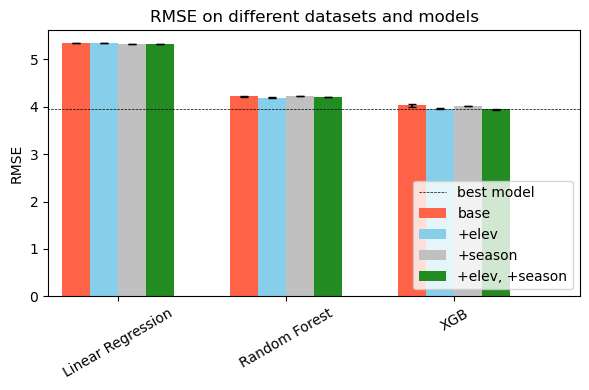

In [131]:
min_value = np.min([rmse_base, rmse_season, rmse_elevation, rmse_both])

n_bars=3
width = 1/(n_bars + 3)

fig, ax = plt.subplots(1, dpi=100)
colors = ['tomato', 'skyblue', 'silver', 'forestgreen']
for i, (mean, std) in enumerate(zip(
    [rmse_base, rmse_season, rmse_elevation, rmse_both],
    [std_base, std_season, std_elevation, std_both]
)):
    ax.bar(
        x=np.arange(3) + i * width,
        height=mean,
        width=width,
        color=colors[i],
        yerr=std,
        capsize=3,
    )
ax.set_xlim((-width,3))
ax.hlines(y=min_value, xmin=-1, xmax=4, linestyle="--", color="k", linewidth=0.5)

ax.set_xticks(np.arange(3) + width * 1.5)
ax.set_xticklabels(["Linear Regression", "Random Forest", "XGB"], rotation=30)
ax.legend(labels=["best model", "base", "+elev", "+season", "+elev, +season"], loc="lower right")
ax.set_ylabel("RMSE")
ax.set_title("RMSE on different datasets and models")
print()
plt.tight_layout()


# interpolation data

In [125]:
import pandas as pd
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_interp_50.csv')

In [134]:
# interp does not have season_wet, so include here
df['season_wet'] = df.apply(lambda row: 1 if row['month'] < 5 or row['month'] > 10 else 0, axis=1) # May - Oct is dry

In [135]:
df.columns

Index(['skn', 'year', 'month', 'data_in', 'name', 'lat', 'lon', 'elevation',
       'Observer', 'Status2010', 'NumMos', 'MinYear', 'MaxYear', 'air2m',
       'air1000_500', 'hgt500', 'hgt1000', 'omega500', 'pottemp1000-500',
       'pottemp1000-850', 'pr_wtr', 'shum-uwnd-700', 'shum-uwnd-925',
       'shum-vwnd-700', 'shum-vwnd-950', 'shum700', 'shum925', 'skt', 'slp',
       'season_wet'],
      dtype='object')

In [136]:
# split
df_train = df.query('year < 1984')
df_valid = df.query('1984 <= year < 1997')
df_test = df.query('1997 <= year')

assert df_train.shape[0] + df_valid.shape[0] + df_test.shape[0] == df.shape[0]

# Define columns: lat, lon and 16 reanalysis variables
columns = deepcopy(C_SINGLE + C_COMMON)
for r in ['fold', 'skn', 'year', 'month', 'data_in']:
    columns.remove(r)

In [138]:
Xtrain, Ytrain = np.array(df_train[columns]), np.array(df_train['data_in'])
Xvalid, Yvalid = np.array(df_valid[columns]), np.array(df_valid['data_in'])
Xtest, Ytest = np.array(df_test[columns]), np.array(df_test['data_in'])

In [139]:
for _ in range(5):
    # hyperparameters acquired in external experiment
    linear_regression = LinearRegression()
    random_forest = RandomForestRegressor(
        n_estimators=270,
        max_depth=None,
        min_samples_split=3,
        n_jobs=-1,
        verbose=False,
    )

    xgboost = XGBRegressor(
        n_estimators=210,
        learning_rate=0.1,
        max_depth=9,
        n_jobs=-1,
        subsample=0.9,
        seed=np.random.randint(100),
        verbosity=0
    )
    linear_regression.fit(Xtrain, Ytrain)
    xgboost.fit(Xtrain, Ytrain)
    random_forest.fit(Xtrain, Ytrain)

    mse_50 = [
        mean_squared_error(Ytest, linear_regression.predict(Xtest)),
        mean_squared_error(Ytest, random_forest.predict(Xtest)),
        mean_squared_error(Ytest, xgboost.predict(Xtest)),
    ]

    print(f"{mse_50=}")

mse_50=[30.922437300955757, 18.43779793588948, 16.49742019926365]
mse_50=[30.922437300955757, 18.429768261909576, 16.514684492934283]
mse_50=[30.922437300955757, 18.322848172241013, 16.767988202444823]
mse_50=[30.922437300955757, 18.34747060523754, 16.844026667100636]
mse_50=[30.922437300955757, 18.47105704909354, 16.79626668946499]


In [140]:
# interp 100
import pandas as pd
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_interp_100.csv')
# interp does not have season_wet, so include here
df['season_wet'] = df.apply(lambda row: 1 if row['month'] < 5 or row['month'] > 10 else 0, axis=1) # May - Oct is dry

In [141]:
# split
df_train = df.query('year < 1984')
df_valid = df.query('1984 <= year < 1997')
df_test = df.query('1997 <= year')

assert df_train.shape[0] + df_valid.shape[0] + df_test.shape[0] == df.shape[0]

# Define columns: lat, lon and 16 reanalysis variables
columns = deepcopy(C_SINGLE + C_COMMON)
for r in ['fold', 'skn', 'year', 'month', 'data_in']:
    columns.remove(r)
    
Xtrain, Ytrain = np.array(df_train[columns]), np.array(df_train['data_in'])
Xvalid, Yvalid = np.array(df_valid[columns]), np.array(df_valid['data_in'])
Xtest, Ytest = np.array(df_test[columns]), np.array(df_test['data_in'])

In [142]:
for _ in range(5):
    # hyperparameters acquired in external experiment
    linear_regression = LinearRegression()
    random_forest = RandomForestRegressor(
        n_estimators=270,
        max_depth=None,
        min_samples_split=3,
        n_jobs=-1,
        verbose=False,
    )

    xgboost = XGBRegressor(
        n_estimators=210,
        learning_rate=0.1,
        max_depth=9,
        n_jobs=-1,
        subsample=0.9,
        seed=np.random.randint(100),
        verbosity=0
    )
    linear_regression.fit(Xtrain, Ytrain)
    xgboost.fit(Xtrain, Ytrain)
    random_forest.fit(Xtrain, Ytrain)

    mse_50 = [
        mean_squared_error(Ytest, linear_regression.predict(Xtest)),
        mean_squared_error(Ytest, random_forest.predict(Xtest)),
        mean_squared_error(Ytest, xgboost.predict(Xtest)),
    ]

    print(f"{mse_50=}")

mse_50=[30.919258466162646, 18.307063849959423, 17.081798109299914]
mse_50=[30.919258466162646, 18.270428634624796, 16.73472186989791]
mse_50=[30.919258466162646, 18.19362563480852, 16.85443335782864]
mse_50=[30.919258466162646, 18.27617017806098, 16.809456724279983]
mse_50=[30.919258466162646, 18.203682808136303, 16.83875963971148]


In [ ]:
# HYPERPARAMETERS ARE DIFFERENT...NONE OF THEM BUT NOBODY CARES, RIGHT?